## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# Import Dataset

In [2]:
df = pd.read_csv('.\datasets\churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
# replace spaces with underscores in the column names
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

# loop through all items in these columns and replace spaces with underscore
for c in categorical_columns:
    df[c] = df[c].str.replace(' ','_')

In [5]:
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No_phone_service,No,No,No_phone_service,No
internetservice,DSL,DSL,DSL,DSL,Fiber_optic
onlinesecurity,No,Yes,Yes,Yes,No


In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [8]:
# for some reason column totalcharges is not showing up as numbers
# use pd function to_numeric
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [9]:
tc.isnull().sum()

11

In [10]:
# view the missing numbers
df[tc.isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,...,Yes,Yes,Yes,No,Two_year,Yes,Bank_transfer_(automatic),52.55,_,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.25,_,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two_year,No,Mailed_check,80.85,_,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.75,_,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,...,Yes,Yes,Yes,No,Two_year,No,Credit_card_(automatic),56.05,_,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,19.85,_,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.35,_,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.00,_,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,One_year,Yes,Mailed_check,19.70,_,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two_year,No,Mailed_check,73.35,_,No


In [11]:
# convert total changes from text to numeric and fill missing values with zeros
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-LVYGI,0.0
753,3115-CZMZD,0.0
936,5709-LVOEQ,0.0
1082,4367-NUYAO,0.0
1340,1371-DWPAZ,0.0
3331,7644-OMVMY,0.0
3826,3213-VVOLG,0.0
4380,2520-SGTTA,0.0
5218,2923-ARZLG,0.0
6670,4075-WKNIU,0.0


In [12]:
df.columns = df.columns.str.lower().str.replace(' ','_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [13]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [14]:
df.churn = (df.churn == 'yes').astype(int)

In [15]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## Set up the validation framework
- Perform the train/validation/test split with Scikit-Learn

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [18]:
len(df_full_train), len(df_test)

(5634, 1409)

In [19]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [23]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## Exploratory Data Analysis
- Check for missing values
- Look at target variable (churn)
- Look at numerical and categorical variables

In [24]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [25]:
df_full_train = df_full_train.reset_index(drop=True)

In [26]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [27]:
df_full_train.isnull().sum()
# there are no missing values, this was fixed earlier

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [28]:
df_full_train.churn

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int32

In [29]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [30]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [31]:
global_churn_rate = round(df_full_train.churn.mean(), 2)
global_churn_rate

0.27

In [32]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [33]:
numerical = ['tenure','monthlycharges','totalcharges']

In [34]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [35]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [36]:
df_full_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
1,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
2,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
3,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
4,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5630,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5631,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
5632,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


In [37]:
# calculate unique values in each column
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance: Churn rate and risk ratio
#### Feature importal analysis (part of EDA) - identify which features affect our target variable
- Churn rate
- Risk ratio
- Mutual information

#### Churn rate

In [38]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [39]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [40]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [41]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [42]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [43]:
# churn rate for people who live with partners
churn_with_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_with_partner

0.20503330866025166

In [44]:
# churn rate for people with no partners
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

### Risk Ratio

In [45]:
churn_no_partner / global_churn

1.2216593879412643

In [46]:
churn_with_partner / global_churn

0.7594724924338315

- people with partners are less likely to churn
- people without partners are high risk to churn regardless of gender

####
    SELECT
        gender,
        AVG(churn),
        AVG(churn) - global_church as diff,
        AVG(church) / global_churn as risk
    FROM
        data
    GROUP BY
        gender;

In [47]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [48]:
df_full_train.groupby('gender').churn.agg(['mean','count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [49]:
df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] - global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,0.006856
male,0.263214,2838,-0.006755,-0.006755


In [50]:
from IPython.display import display

In [51]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] - global_churn
    display(df_group)
    print()
    print()
    

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,0.006856
male,0.263214,2838,-0.006755,-0.006755




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,-0.027698
1,0.413377,912,0.143409,0.143409




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,0.059841
yes,0.205033,2702,-0.064935,-0.064935




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,0.043792
yes,0.165666,1666,-0.104302,-0.104302




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,-0.028652
yes,0.273049,5087,0.003081,0.003081




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,-0.012561
no_phone_service,0.241316,547,-0.028652,-0.028652
yes,0.290742,2387,0.020773,0.020773




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,-0.077621
fiber_optic,0.425171,2479,0.155203,0.155203
no,0.077805,1221,-0.192163,-0.192163




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,0.150953
no_internet_service,0.077805,1221,-0.192163,-0.192163
yes,0.153226,1612,-0.116742,-0.116742




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,0.134355
no_internet_service,0.077805,1221,-0.192163,-0.192163
yes,0.217232,1915,-0.052736,-0.052736




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,0.125907
no_internet_service,0.077805,1221,-0.192163,-0.192163
yes,0.230412,1940,-0.039556,-0.039556




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,0.148946
no_internet_service,0.077805,1221,-0.192163,-0.192163
yes,0.159926,1632,-0.110042,-0.110042




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,0.072864
no_internet_service,0.077805,1221,-0.192163,-0.192163
yes,0.302723,2167,0.032755,0.032755




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,0.068938
no_internet_service,0.077805,1221,-0.192163,-0.192163
yes,0.307273,2200,0.037305,0.037305




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,0.161733
one_year,0.120573,1186,-0.149395,-0.149395
two_year,0.028274,1344,-0.241694,-0.241694




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,-0.097897
yes,0.338151,3321,0.068183,0.068183




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,-0.101797
credit_card_(automatic),0.164339,1217,-0.105630,-0.105630
electronic_check,0.455890,1893,0.185922,0.185922
mailed_check,0.193870,1305,-0.076098,-0.076098


 ## Feature importance: Mutual Information
 ##### Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

In [52]:
from sklearn.metrics import mutual_info_score

In [53]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [54]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [55]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [56]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [57]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature importance: Correlation
##### How about numerical columns?
- Correlation coefficient (dependency between 2 variables)

In [58]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [59]:
# increase of tenure, church rate goes down
# totalcharges - the more people pay, the more they are likely to stay

In [60]:
## churn rate for people who stay less than 2 months is pretty high
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [61]:
# churn rate for people who stay longer than 2 months but less than 12 months
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [62]:
# churn rate for people who stay longer than 1 year
df_full_train[(df_full_train.tenure >12)].churn.mean()

0.17634908339788277

In [63]:
# churn rate by monthly charges less than $20/mo
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [64]:
# churn rate by monthly charges >$20 and <= $50
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [65]:
# churn rate by monthly charges more than $50/mo
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

In [66]:
# get the most important numerical values
# understand how numerical variables affect the target variable
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

## One-hot encoding
- Use Scikit-Learn to encode categorical features

In [67]:
from sklearn.feature_extraction import DictVectorizer

In [68]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [69]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient='records')

In [70]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [71]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [72]:
dict_vectorizer = dv(sparse=False)

NameError: name 'dv' is not defined

In [ ]:
dict_vectorizer.fit(train_dicts)
X_train = dict_vectorizer.transform(train_dicts)

In [ ]:
X_train.shape

(4225, 45)

In [ ]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [ ]:
X_val = dict_vectorizer.transform(val_dicts)

## Logistic Regression
- Binary classification
- Linear vs logistic regression

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [ ]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

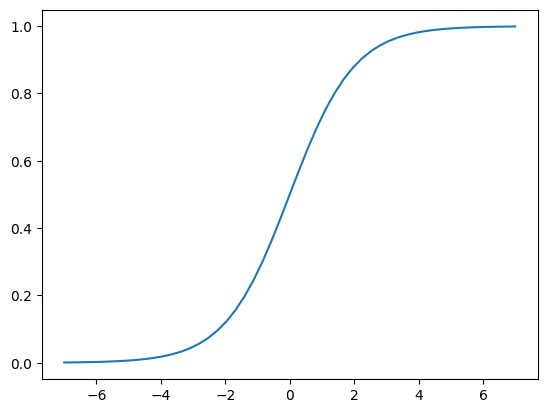

In [ ]:
plt.plot(z, sigmoid(z))

In [ ]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    
    return result

In [ ]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

## Training logistic regression with Scikit-Learn
- train a model with scikit-learn
- apply it to the validation dataset
- calculate the accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.intercept_[0]

-0.10903343178052823

In [ ]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [ ]:
model.predict(X_train)
# hard predictions

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
model.predict_proba(X_train)[:, 1]
# soft predictions

array([0.09548406, 0.67933168, 0.63368072, ..., 0.53163429, 0.04254323,
       0.69873006])

In [ ]:
y_pred = model.predict_proba(X_val)[:,1]

In [ ]:
y_pred

array([0.00899717, 0.20452653, 0.21222482, ..., 0.13639353, 0.79977146,
       0.83740791])

In [ ]:
churn_decision = (y_pred >= 0.5)

In [ ]:
# customers who are to church and will receive email
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [ ]:
# let's check how accurate our predictions are
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
(y_val == churn_decision).mean()

0.8034066713981547

In [ ]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [ ]:
df_pred

,probability,prediction,actual
0,0.008997,0,0
1,0.204527,0,0
2,0.212225,0,0
3,0.543051,1,1
4,0.213787,0,0
...,...,...,...
1404,0.313675,0,0
1405,0.039360,0,1
1406,0.136394,0,0
1407,0.799771,1,1


In [ ]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [ ]:
df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204527,0,0,True
2,0.212225,0,0,True
3,0.543051,1,1,True
4,0.213787,0,0,True
...,...,...,...,...
1404,0.313675,0,0,True
1405,0.039360,0,1,False
1406,0.136394,0,0,True
1407,0.799771,1,1,True


In [ ]:
df_pred.correct

0        True
1        True
2        True
3        True
4        True
        ...  
1404     True
1405    False
1406     True
1407     True
1408     True
Name: correct, Length: 1409, dtype: bool

In [ ]:
df_pred.correct.mean()

0.8034066713981547

## Model Interpretation
- look at the coefficients
- train a smaller model with fewer features

In [ ]:
small = ['contract', 'tenure', 'monthlycharges']

In [ ]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [ ]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [ ]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [ ]:
X_train_small = dv_small.transform(dicts_train_small)
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [ ]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [ ]:
w0 = model_small.intercept_[0]
w0

-2.476775659676377

In [ ]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [ ]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [ ]:
# raw score for the customer
-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036)

-0.3300000000000001

In [ ]:
sigmoid(-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036))
# this is the probability to church

0.41824062315816374

## Using the model

In [ ]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [ ]:
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [ ]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [ ]:
y_full_train = df_full_train.churn.values

In [ ]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [ ]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [ ]:
X_test = dv.transform(dicts_test)

In [ ]:
y_pred = model.predict_proba(X_test)[:, 1]

In [ ]:
churn_decision = (y_pred >= 0.5)

In [ ]:
(churn_decision == y_test).mean()

0.815471965933286

In [ ]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [ ]:
dv.transform([customer])

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [ ]:
X_small = dv.transform([customer])

In [ ]:
model.predict_proba(X_small)[0,1]

0.405681097782252

In [ ]:
y_test[10]

0